<a href="https://colab.research.google.com/github/Light-700/Test/blob/main/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Handwritten digits classification using neural network</h1>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from keras.src.legacy.preprocessing.image import ImageDataGenerator # Use the correct path for ImageDataGenerator

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
df = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train.head(6)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

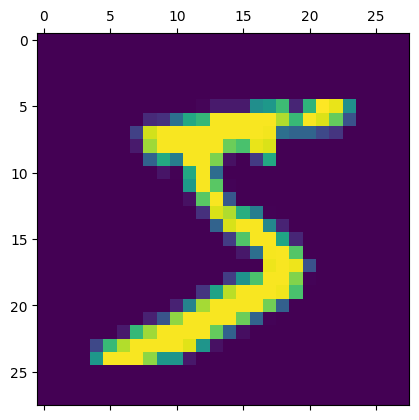

In [ ]:
plt.matshow(X_train[0])

In [ ]:
y_train[0]

5

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

features1 = X_train
features2 = X_test
labels1 = y_train
labels2 = y_test

In [ ]:
from sklearn import preprocessing
from sklearn.utils import shuffle
#normalizaion
scaler = preprocessing.MinMaxScaler()
features1 = features1.reshape(-1, 28 * 28)
features1_normalized = scaler.fit_transform(features1)
labels1_onehot = pd.get_dummies(labels1)
features1_normalized, labels1_onehot = sklearn.utils.shuffle(features1_normalized, labels1_onehot)

features2 = features2.reshape(-1, 28 * 28)
features2_normalized = scaler.fit_transform(features2)
labels2_onehot = pd.get_dummies(labels2)
features2_normalized, labels2_onehot = sklearn.utils.shuffle(features2_normalized, labels2_onehot)


In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<h2>Neural networks with no hidden layers</h2>

In [ ]:
!pip install keras

In [ ]:
import sklearn

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(50, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 10.0418 - accuracy: 0.8405
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 6.0414 - accuracy: 0.8792
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 5.6558 - accuracy: 0.8830
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.6324 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4297 - accuracy: 0.8864
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2645 - accuracy: 0.8883
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2708 - accuracy: 0.8881
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.1643 - accuracy: 0.8900
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.1536 - accuracy: 0.8896
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.12

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 6.3281 - accuracy: 0.8833


[6.32811164855957, 0.8833000063896179]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([0.0000000e+00, 0.0000000e+00, 1.0504907e-07, 1.0000000e+00,
       9.0996381e-19, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

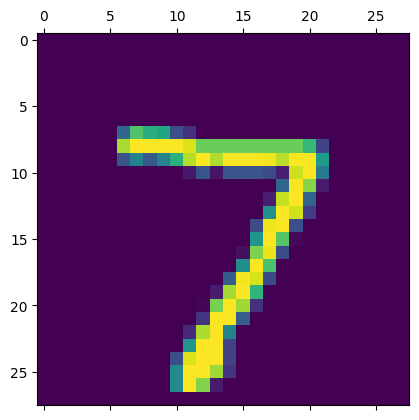

In [ ]:
plt.matshow(X_test[0])

In [ ]:
np.argmax(y_predicted[0])

3

In [ ]:
from sklearn.wrappers import KerasClassifier

ModuleNotFoundError: No module named 'sklearn.wrappers'

In [ ]:
sklearn_model = KerasClassifier(build_fn=model, epochs=10)

NameError: name 'KerasClassifier' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
  'learning_rate': [0.01, 0.02, 0.1],
  'optimizer': ['adam', 'sgd'],
  'activation': ['relu', 'tanh', 'sigmoid'],
  'loss': ['sparse_categorical_crossentropy', 'mse']
}

grid_search = GridSearchCV(sklearn_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

NameError: name 'sklearn_model' is not defined

In [ ]:
print("Parameters of Best Estimator in Model: ")
print(search.best_params_)
print("Best score in grid search:")
print(search.best_score_)
model = MyModelClass(**best_params)

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    2,    1,    2,    0,    0,    0,    0,    0],
       [   6, 1125,    3,    0,    1,    0,    0,    0,    0,    0],
       [ 112,  337,  581,    0,    2,    0,    0,    0,    0,    0],
       [ 257,  166,  540,   45,    0,    2,    0,    0,    0,    0],
       [  10,   31,  513,   67,  359,    1,    1,    0,    0,    0],
       [ 249,   47,  343,   98,   73,   82,    0,    0,    0,    0],
       [ 138,   23,  786,    0,    9,    2,    0,    0,    0,    0],
       [  22,   73,  350,  415,  109,   32,    0,   27,    0,    0],
       [  68,  267,  605,    4,   16,   13,    0,    0,    1,    0],
       [  21,   32,  358,  312,  282,    1,    0,    3,    0,    0]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

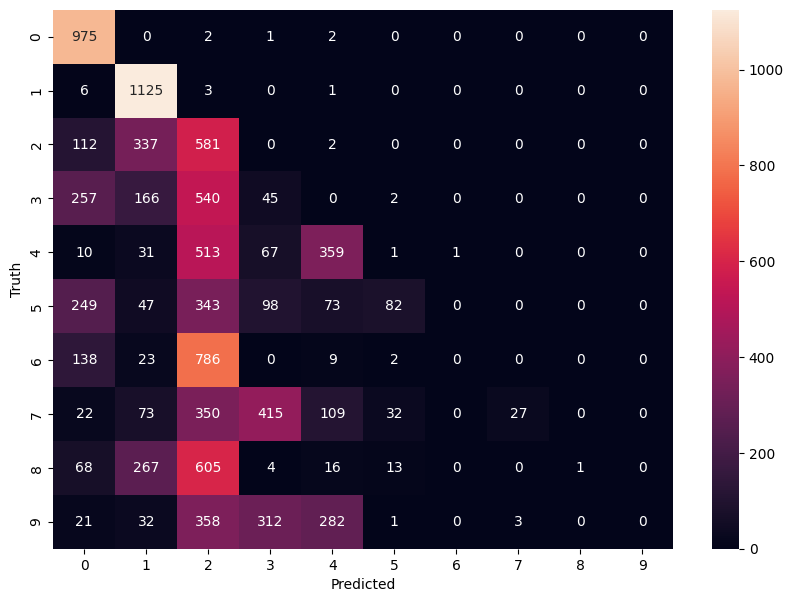

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h1>Using hidden layers</h1>

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2374 - accuracy: 0.9323
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0993 - accuracy: 0.9705
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0662 - accuracy: 0.9791
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0495 - accuracy: 0.9844
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0361 - accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0282 - accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0217 - accuracy: 0.9931
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0172 - accuracy: 0.9944
Epoch 9/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0148 - accuracy: 0.9953
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0883 - accuracy: 0.9781


[0.08825270086526871, 0.9781000018119812]

313/313 [==============================] - 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

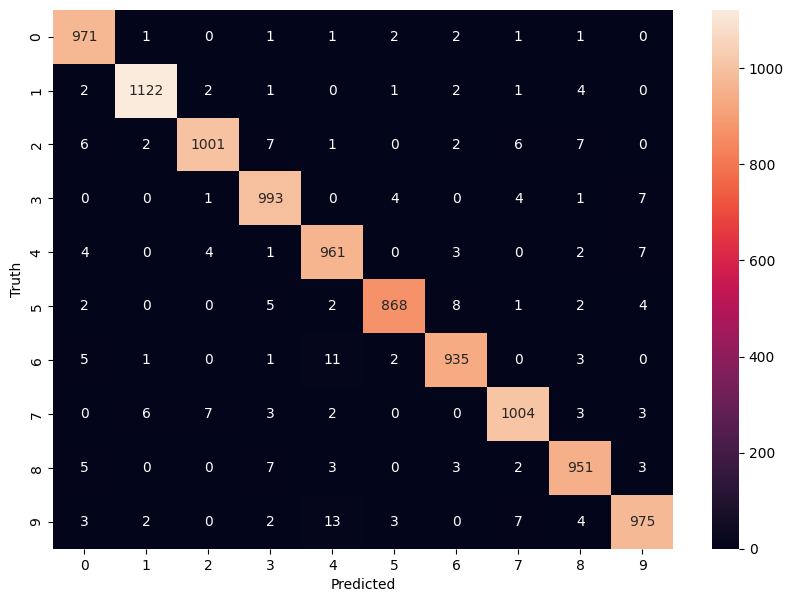

In [ ]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(20, activation='sigmoid')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.5151 - accuracy: 0.8777
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3253 - accuracy: 0.9278
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2249 - accuracy: 0.9439
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1654 - accuracy: 0.9548
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1455 - accuracy: 0.9604
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1267 - accuracy: 0.9649
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1173 - accuracy: 0.9682
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1128 - accuracy: 0.9690
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1010 - accuracy: 0.9732
Epoch 10/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.09

In [ ]:
from sklearn.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

sklearn_model = KerasClassifier(build_fn=model2, epochs=10)
param_grid = {
  'learning_rate': [0.01, 0.02, 0.1],
  'optimizer': ['adam', 'sgd'],
  'activation': ['relu', 'tanh', 'sigmoid'],
  'loss': ['sparse_categorical_crossentropy', 'mse']
}

grid_search = GridSearchCV(model2, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

ModuleNotFoundError: No module named 'keras.sklearn'

In [ ]:
print("Parameters of Best Estimator in Model: ")
print(search.best_params_)
print("Best score in grid search:")
print(search.best_score_)

In [ ]:
model2 = MyModelClass(**best_params)_

In [ ]:
model2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1448 - accuracy: 0.9623


[0.14476759731769562, 0.9623000025749207]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

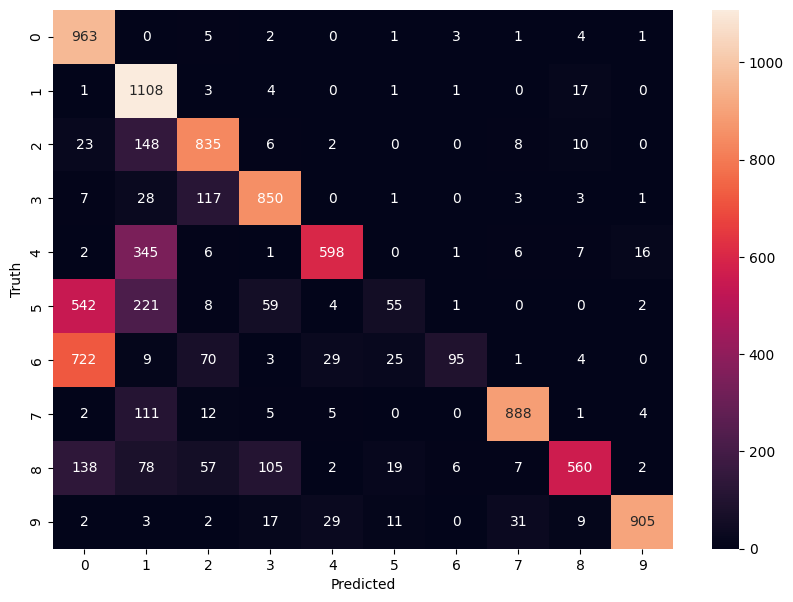

In [ ]:
y_predicted = model2.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Image Augmentation

In [ ]:
# CREATE MORE IMAGES VIA DATA AUGMENTATION
datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range = 0.10,
        width_shift_range=0.1,
        height_shift_range=0.1)

In [ ]:
i=10
sample_image = X_train[i]
sample_image.shape

(28, 28)

In [ ]:
X_train = np.expand_dims(X_train, axis=-1) #(num_samples, height, width) ----> (num_samples, height, width, 1)

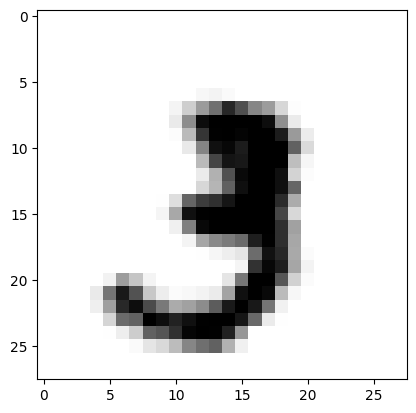

In [ ]:
# Choose a single image for visualization
i=10
sample_image = X_train[i]
sample_image = sample_image.reshape((1,) + sample_image.shape)
augmented_image = datagen.flow(sample_image, batch_size=1)
plt.imshow(augmented_image[0].reshape((28, 28)), cmap=plt.cm.binary)


In [ ]:
sample_image.shape

(1, 28, 28, 1)

In [ ]:
import cv2

In [ ]:
# Preview augmented versions of the same image
plt.figure(figsize=(12, 8))

plt.imshow(sample_image[0].reshape((28, 28)), cmap='gray')
plt.title("Original Image")
plt.subplot(1, 6, 1)
plt.axis('off')
for i in range(6):  # Generate 6 augmented versions

    augmented_image = datagen.flow(sample_image, batch_size=1).next()

    plt.imshow(augmented_image[0].reshape((28, 28)), cmap='gray')
    plt.title("Augmented Image")
    plt.subplot(1, 6, i + 1)
    plt.axis('off')
plt.show()

<ipython-input-37-db4feb853d44>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 6, 1)
